In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

Читаем данные - информацию о моделировании работы ЦОД за 366 дней. Наблюдения велись каждые 12 минут.

Получаем два датафрейма для модели ЦОД, где стоят уставки системы охлаждения в 16 и 18 градусов (назовем эти константные модели C16 и C18 соответственно).

И датафрейм для модели ЦОД, в которой контроль среды осущвствлялся моделью RL-агентом (A2C).

In [169]:
sim_df_18 = pd.read_parquet('simulation_data_SP18.parquet')
sim_df_16 = pd.read_parquet('simulation_data_SP16.parquet')
rl_df = pd.read_parquet('ray_agent_data.parquet')

# Данные состоят из следующих колонок
rl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43920 entries, 0 to 43919
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   day                                     43920 non-null  int64  
 1   time                                    43920 non-null  float64
 2   cooling_setpoint                        43920 non-null  float64
 3   Humidity_setpoint                       43920 non-null  float64
 4   AHU_Supply_Temp                         43920 non-null  float64
 5   Facility_Total_Electricity_Demand_Rate  43920 non-null  float64
 6   Temp_Z_1                                43920 non-null  float64
 7   Temp_Z_2                                43920 non-null  float64
 8   Temp_Z_3                                43920 non-null  float64
 9   Temp_Z_4                                43920 non-null  float64
 10  Temp_Z_5                                43920 non-null  fl

Статистики по температурам в корридорах, контролируемых моделью

In [170]:
zones_temp_cols = [x for x in rl_df.columns if 'Temp_Z' in x]
rl_df[zones_temp_cols].describe()

,Temp_Z_1,Temp_Z_2,Temp_Z_3,Temp_Z_4,Temp_Z_5,Temp_Z_6,Temp_Z_7,Temp_Z_8,Temp_Z_9,Temp_Z_10,Temp_Z_11
count,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000
mean,24.289769,17.256040,21.881702,17.256036,21.881699,17.256036,21.881698,17.256035,20.740214,17.256038,24.290060
std,0.290439,0.232496,0.256796,0.232495,0.256794,0.232494,0.256792,0.232493,0.250429,0.232494,0.290889
min,23.433541,16.963792,21.140700,17.003318,21.169251,17.003317,21.183347,17.003315,20.055372,16.991467,23.459610
25%,24.048266,17.046698,21.667084,17.046696,21.667095,17.046696,21.667106,17.046717,20.528211,17.046685,24.048182
50%,24.205793,17.170332,21.790483,17.170360,21.790525,17.170360,21.790525,17.170417,20.648755,17.170284,24.206042
75%,24.534291,17.447041,22.099707,17.446957,22.099719,17.446957,22.099686,17.446953,20.954297,17.446996,24.534732
max,25.611639,18.376735,23.112378,18.348707,23.092049,18.347963,23.079797,18.329846,21.936114,18.359748,25.572269


Статистики по температурам в корридорах, контролируемых константными уставками:

In [171]:
# Для уставки системы охлаждения = 18 градусов (модель C18)
sim_df_18[zones_temp_cols].describe()

,Temp_Z_1,Temp_Z_2,Temp_Z_3,Temp_Z_4,Temp_Z_5,Temp_Z_6,Temp_Z_7,Temp_Z_8,Temp_Z_9,Temp_Z_10,Temp_Z_11
count,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000
mean,25.060148,17.999982,22.642630,17.999983,22.642630,17.999983,22.642630,17.999984,21.497167,17.999982,25.060447
std,0.083070,0.001543,0.048554,0.001382,0.048553,0.001384,0.048552,0.001304,0.036857,0.001493,0.083484
min,24.566561,17.679695,22.158796,17.712089,22.163706,17.711635,22.164341,17.727961,21.023002,17.689591,24.563281
25%,25.008434,17.999985,22.614043,17.999986,22.614043,17.999986,22.614043,17.999986,21.475481,17.999985,25.008361
50%,25.068215,17.999991,22.646666,17.999991,22.646667,17.999991,22.646667,17.999991,21.500297,17.999991,25.068011
75%,25.120367,17.999995,22.673892,17.999995,22.673892,17.999995,22.673892,17.999995,21.520959,17.999995,25.120950
max,25.257637,18.000022,22.772163,18.000019,22.772163,18.000019,22.772162,18.000018,21.595290,18.000020,25.257687


In [172]:
# Для уставки системы охлаждения = 16 градусов (модель C16)
sim_df_16[zones_temp_cols].describe()

,Temp_Z_1,Temp_Z_2,Temp_Z_3,Temp_Z_4,Temp_Z_5,Temp_Z_6,Temp_Z_7,Temp_Z_8,Temp_Z_9,Temp_Z_10,Temp_Z_11
count,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000
mean,23.680092,16.636054,21.265251,16.637075,21.265776,16.637113,21.265530,16.636577,20.122602,16.635322,23.679680
std,1.440397,1.382324,1.415560,1.383947,1.416399,1.383984,1.415903,1.382929,1.406360,1.380941,1.439237
min,22.376265,15.756069,20.030571,15.809403,20.050280,15.809343,20.060846,15.836566,18.925982,15.780858,22.393257
25%,22.975122,15.999997,20.588828,15.999997,20.588828,15.999997,20.588829,15.999997,19.456235,15.999997,22.975142
50%,23.044808,16.000003,20.629558,16.000003,20.629558,16.000003,20.629558,16.000002,19.487186,16.000003,23.044959
75%,23.147724,16.000011,20.694264,16.000010,20.694263,16.000010,20.694254,16.000009,19.536150,16.000011,23.149295
max,29.608676,22.578879,27.149056,22.568502,27.143023,22.566776,27.136436,22.555233,25.979708,22.569369,29.613932


Зачения уставок:

In [173]:
# Средние показатели уставок агента

str_setpoints = "Mean HVAC cooling setpoint: {}\nMean AHU supply temperature: {}\nMean humidity setpoint: {}"
print(str_setpoints.format(
        np.mean(rl_df['cooling_setpoint']),
        np.mean(rl_df['AHU_Supply_Temp']),
        np.mean(rl_df['Humidity_setpoint']))
     )

Mean HVAC cooling setpoint: 17.255997903136798
Mean AHU supply temperature: 5.596176762032053
Mean humidity setpoint: 13.97611709984328


In [174]:
# Уставки для константной модели C18

print(str_setpoints.format(
        np.mean(sim_df_18['cooling_setpoint']),
        np.mean(sim_df_18['AHU_Supply_Temp']),
        np.mean(sim_df_18['Humidity_setpoint']))
     )

Mean HVAC cooling setpoint: 17.99999
Mean AHU supply temperature: 12.400000000000002
Mean humidity setpoint: 15.699999999999994


In [175]:
# Уставки для константной модели C16

print(str_setpoints.format(
        np.mean(sim_df_16['cooling_setpoint']),
        np.mean(sim_df_16['AHU_Supply_Temp']),
        np.mean(sim_df_16['Humidity_setpoint']))
     )

Mean HVAC cooling setpoint: 15.9999995
Mean AHU supply temperature: 10.0
Mean humidity setpoint: 15.699999999999994


Посчитаем сколько энергии потралила модель за весь перод моделирования

In [176]:
# Энергия затраченная RL-агентом
model_energy = sum(rl_df['Facility_Total_Electricity_Demand_Rate'])
model_energy

24194094251.632885

In [177]:
# Энергия затраченная константными моделями C18, C16
C18_energy = sum(sim_df_18['Facility_Total_Electricity_Demand_Rate'])
C16_energy = sum(sim_df_16['Facility_Total_Electricity_Demand_Rate'])

print(f'Total Electricity Rate:\nC18 = {C18_energy};\nC16 = {C16_energy}.')

Total Electricity Rate:
C18 = 24325026964.471252;
C16 = 27747552712.335587.


In [178]:
# Посмотрим сколько сэкономили
delta_C16 = C16_energy - model_energy
delta_C18 = C18_energy - model_energy
print(f'Разница с моделью C16: {delta_C16}\nРазница с моделью C18: {delta_C18}')

Разница с моделью C16: 3553458460.7027016
Разница с моделью C18: 130932712.83836746


In [179]:
# Посмотрим сколько это в долях от энергии затраченной константными моделями
print('For C16:', delta_C16 / C16_energy)
print('For C18:', delta_C18 / C18_energy)

For C16: 0.12806385116345625
For C18: 0.005382633821109662


Гистограммы распределения значений уставок для контролируемых агентом параметров:

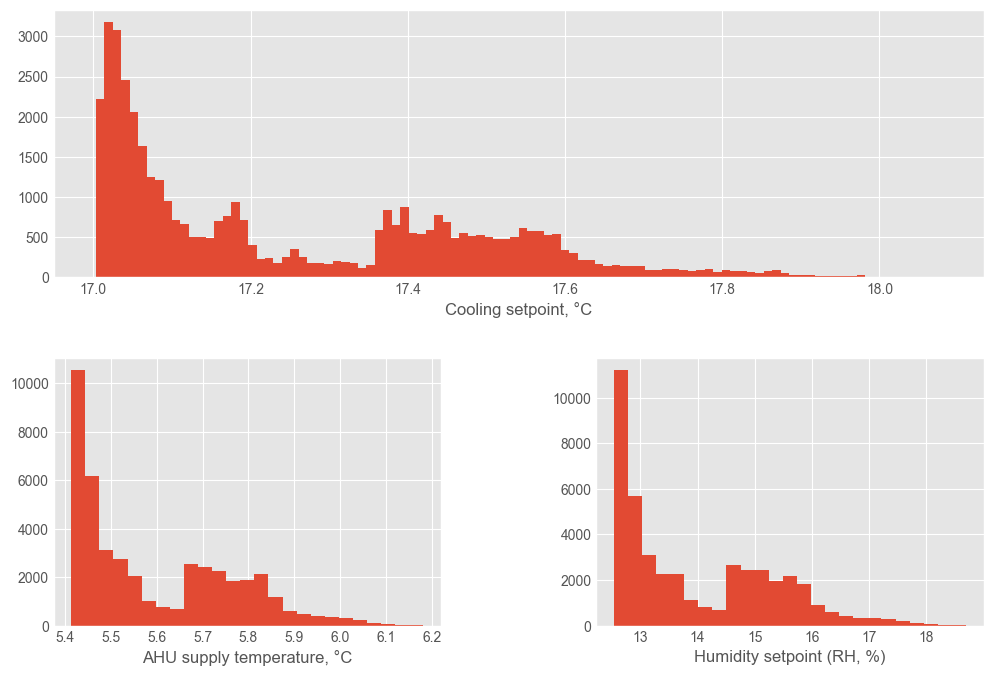

In [180]:
fig = plt.figure(figsize=(12, 8))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
main_ax = fig.add_subplot(grid[0, 0:])
main_ax.set_xlabel('Cooling setpoint, °C')

b_ax1 = fig.add_subplot(grid[1, 0])
b_ax1.set_xlabel('AHU supply temperature, °C')

b_ax2 = fig.add_subplot(grid[1, 1])
b_ax2.set_xlabel('Humidity setpoint (RH, %)')


main_ax.hist(rl_df['cooling_setpoint'], bins=100)
b_ax1.hist(rl_df['AHU_Supply_Temp'], bins=25)
b_ax2.hist(rl_df['Humidity_setpoint'], bins=25);

In [181]:
zones_rh_cols = [x for x in rl_df.columns if 'RH' in x]
rl_df[zones_rh_cols].describe()

,RH_Z_1,RH_Z_5,RH_Z_6,RH_Z_7,RH_Z_11
count,43920.000000,43920.000000,43920.000000,43920.000000,43920.000000
mean,22.688168,26.258138,35.013139,26.258110,22.687608
std,9.260409,10.747268,14.353280,10.747279,9.259939
min,10.254819,11.872710,15.906471,11.872369,10.254206
25%,13.778775,15.928988,21.231117,15.928983,13.778899
50%,20.659860,23.895347,31.892009,23.894984,20.659951
75%,34.296774,39.750454,53.037102,39.750287,34.291614
max,38.322937,44.363307,59.115266,44.362773,38.327751


In [182]:
rl_df['RH_Z_6'].describe()

count    43920.000000
mean        35.013139
std         14.353280
min         15.906471
25%         21.231117
50%         31.892009
75%         53.037102
max         59.115266
Name: RH_Z_6, dtype: float64